In [72]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
import matplotlib.pyplot as plt
import numpy as np 

In [74]:
# import wget
# wget.download('https://cdn.pixabay.com/photo/2017/01/31/18/11/chess-2026115_1280.png')

In [75]:
import cv2 

In [76]:
img = cv2.imread('chest1.png')

In [77]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

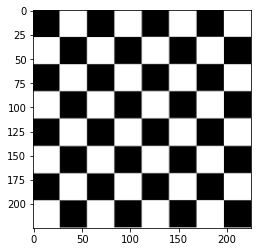

In [78]:
plt.gray()
plt.imshow(gray_img)

In [79]:
gray_img.shape

(225, 225)

In [80]:
sobelX = [[-1,  0, 1], [-2, 0, 2], [-1, 0, 1]]
sobelY = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]

In [81]:
def getCoord(kernel):
  center_filter = [1, 1]
  x_Rows = [0, 0, 1, -1, 1, -1, 1, -1]
  y_Cols = [-1, 1, 0, 0, -1, -1, 1, 1]
  for k in range(8):
    pixel_in_filter_x = center_filter[0] + x_Rows(k)
    pixel_in_filter_y = center_filter[1] + y_Cols(k)
    

In [82]:
gray_img.shape[1]

225

In [83]:
gray_img.shape

(225, 225)

In [84]:
a = np.copy(gray_img)
a 

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ..., 147, 147, 147]], dtype=uint8)

In [85]:

def Conv(gray_img, kernel):
  transformed = np.copy(gray_img)
  m = transformed.shape[0]
  n = transformed.shape[1]
  for i in range(1, m-1):
    for j in range(1, n-1):
      center_pixel = [i, j]
      center_filter = [1, 1]
      xRows = [0, 0, 1, -1, 1, -1, 1, -1]
      yCols = [-1, 1, 0, 0, -1, -1, 1, 1]
      new_val = 0.0

      for k in range(8):
        item = [xRows[k], yCols[k]]
        pixel_in_image_x = center_pixel[0] + item[0]
        pixel_in_image_y = center_pixel[1] + item[1]
        pixel_in_filter_x = center_filter[0] + item[0]
        pixel_in_filter_y = center_filter[1] + item[1]
        new_val = new_val + (kernel[pixel_in_filter_x][pixel_in_filter_y] * gray_img[pixel_in_image_x][pixel_in_image_y])
      new_val = new_val + (kernel[1][1] * gray_img[i][j])
      if new_val < 0:
        new_val = 0
      if new_val > 255:
        new_val = 255

      transformed[i][j] = new_val + 2
  return transformed 

    


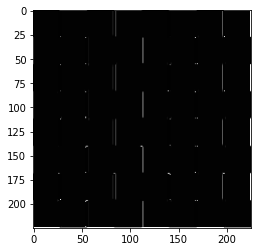

In [86]:
result = Conv(gray_img, sobelX)
plt.imshow(result)
plt.show()

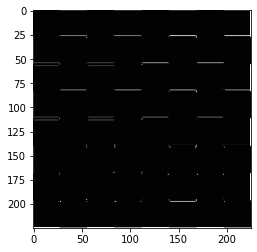

In [87]:
result_1 = Conv(gray_img, sobelY)
plt.imshow(result_1)
plt.show()

In [88]:
result_1.shape

(225, 225)

In [92]:
result_1.shape[0]

225

In [108]:
def MaxP(img):
  xRows = [1, 1, 0]
  yCols = [0, 1, 1]
  m = img.shape[0]
  n = img.shape[1]
  new_img = np.zeros((m//2 + 1, n//2 + 1))
  

  for i in range(0, m, 2):
    for j in range(0, n, 2):
      current = [img[i][j]]
      for k in range(3):
        next_x = i + xRows[k]
        next_y = j + yCols[k]
        if next_x < m and next_y < n:
          current.append(img[next_x][next_y])
      new_img[i//2][j//2] = max(current)
  return new_img

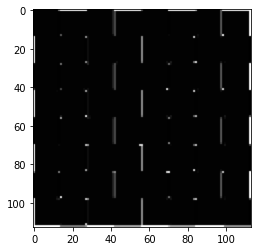

In [109]:
a1 = MaxP(result)
plt.imshow(a1)
plt.show()

In [99]:
result

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   2,   2, ...,   2,   2, 255],
       [  0,   2,   2, ...,   2,   2, 255],
       ...,
       [255,   2,   2, ...,   2,   2,   0],
       [255,   2,   2, ...,   2,   2,   0],
       [255, 255, 255, ..., 147, 147, 147]], dtype=uint8)